In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("/content/Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [6]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [8]:
import seaborn as sns

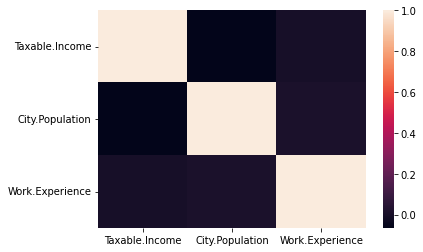

In [9]:
sns.heatmap(data.corr())

In [10]:
# encode variables with ordinal encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


In [19]:
data["Undergrad"]=le.fit_transform(data["Undergrad"])
data["Urban"]=le.fit_transform(data["Urban"])
data["Marital.Status"]=le.fit_transform(data["Marital.Status"])

In [12]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [21]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
data["TaxInc"] = pd.cut(data["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [22]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [23]:
data.drop(labels=['Taxable.Income'],axis=1,inplace=True)

In [24]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
data = pd.get_dummies(data,columns = ["TaxInc"],drop_first=True)

In [25]:
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxInc_Good
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1


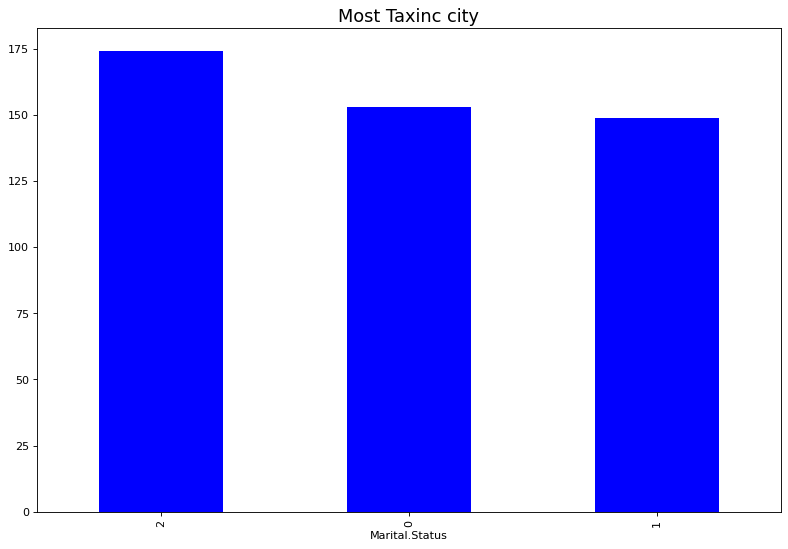

In [30]:
Maritial_status=data.groupby("Marital.Status")["TaxInc_Good"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
Maritial_status.plot.bar(color="b")
plt.title("Most Taxinc city",fontsize=16)
plt.show()

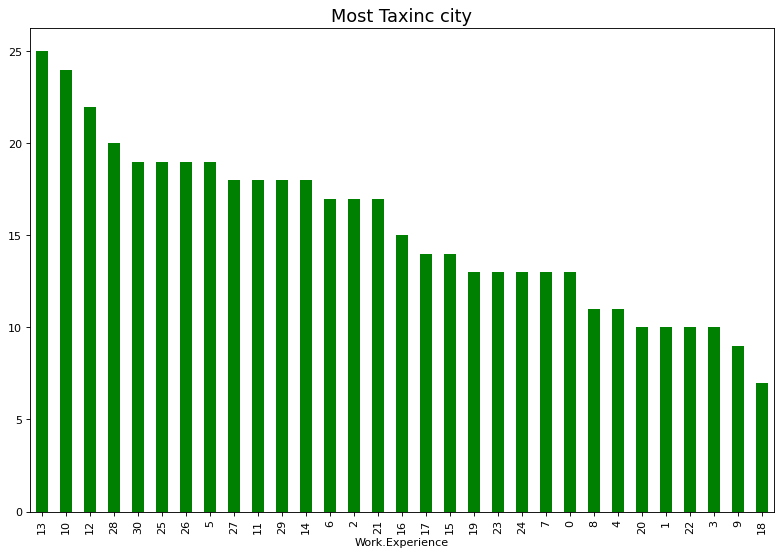

In [32]:
work_exp=data.groupby("Work.Experience")["TaxInc_Good"].sum().nlargest(50)
plt.figure(figsize=(12,8),dpi=80)
work_exp.plot.bar(color="g")
plt.title("Most Taxinc city",fontsize=16)
plt.show()

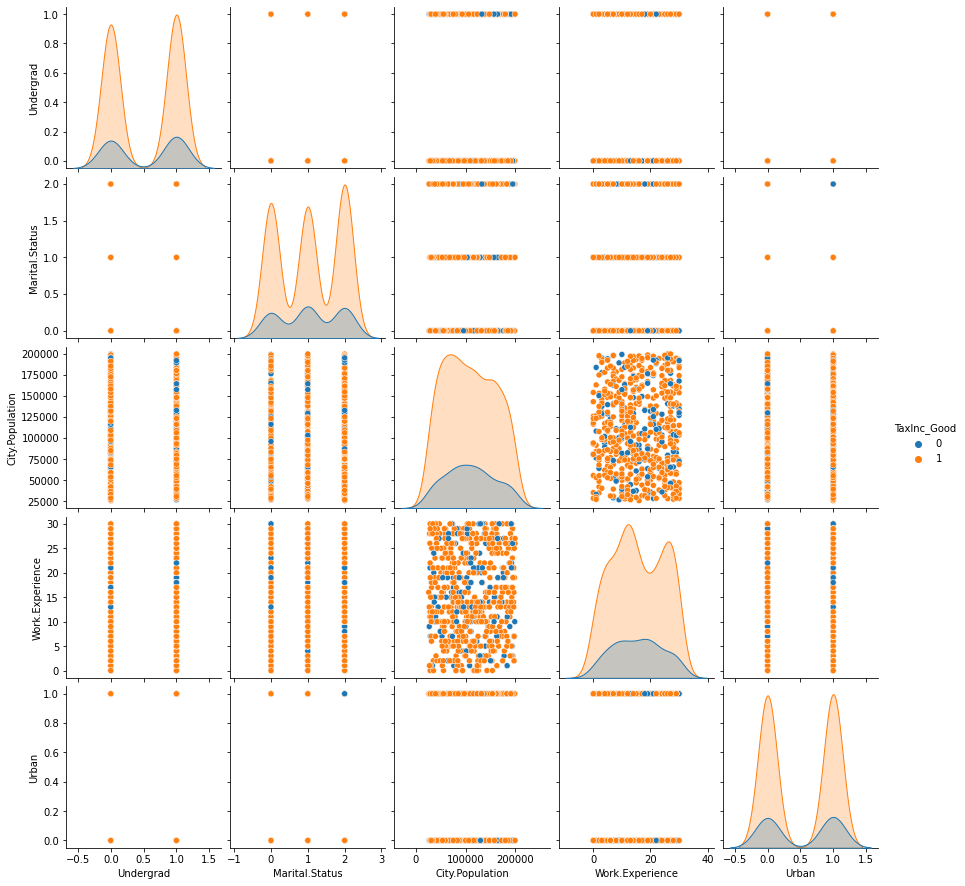

In [42]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=data, hue ="TaxInc_Good")


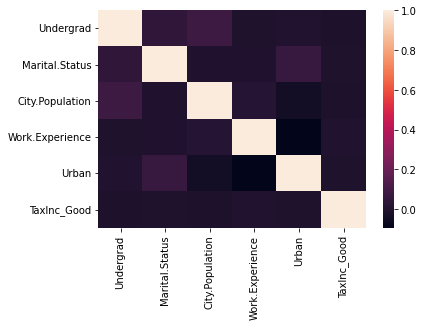

In [43]:
# correlation matrix
sns.heatmap(data.corr())

In [44]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [46]:
# Normalized data frame (considering the numerical part of data)
data_norm = norm_func(data.iloc[:,1:])
data_norm.tail(10)

,Marital.Status,City.Population,Work.Experience,Urban,TaxInc_Good
590,0.5,0.341473,0.466667,1.0,1.0
591,1.0,0.615406,0.600000,1.0,0.0
592,1.0,0.283703,0.533333,0.0,1.0
593,0.0,0.610256,0.333333,1.0,1.0
594,0.5,0.412341,0.300000,1.0,1.0
595,0.0,0.078811,0.233333,1.0,1.0
596,0.0,0.170058,0.066667,1.0,1.0
597,0.0,0.737240,0.000000,1.0,1.0
598,0.5,0.886810,0.566667,0.0,1.0
599,0.0,0.760683,0.533333,0.0,1.0


In [47]:
# Declaring features & target
X = data_norm.drop(['TaxInc_Good'], axis=1)
y = data_norm['TaxInc_Good']

In [50]:
X.value_counts()

Marital.Status  City.Population  Work.Experience  Urban
0.0             0.005948         0.300000         0.0      1
1.0             0.052788         0.066667         0.0      1
                0.059207         0.400000         1.0      1
                0.064236         0.466667         0.0      1
                0.070661         0.400000         1.0      1
                                                          ..
0.5             0.033517         0.566667         1.0      1
                0.040966         0.400000         1.0      1
                0.044144         0.933333         0.0      1
                0.055753         0.400000         0.0      1
1.0             0.999534         0.866667         1.0      1
Length: 600, dtype: int64

In [53]:
X.head()

,Marital.Status,City.Population,Work.Experience,Urban
0,1.0,0.139472,0.333333,1.0
1,0.0,0.622394,0.600000,1.0
2,0.5,0.772568,1.000000,1.0
3,1.0,0.962563,0.500000,1.0
4,0.5,0.010081,0.933333,0.0


In [54]:
y.value_counts()

1.0    476
0.0    124
Name: TaxInc_Good, dtype: int64

1 represent Good and 0 represent Risky

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree


In [57]:
# Create train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [68]:
## Building Decision Tree Classifier using Entropy Criteria Iteration-1: Max Depth = 2
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [60]:
#Predicting on test data
pred_test1 = model1.predict(X_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test))
#Predicting on train data
pred_train1 = model1.predict(X_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train))

Test data Accuracy is: 0.7944444444444444
Train data Accuracy is: 0.7928571428571428


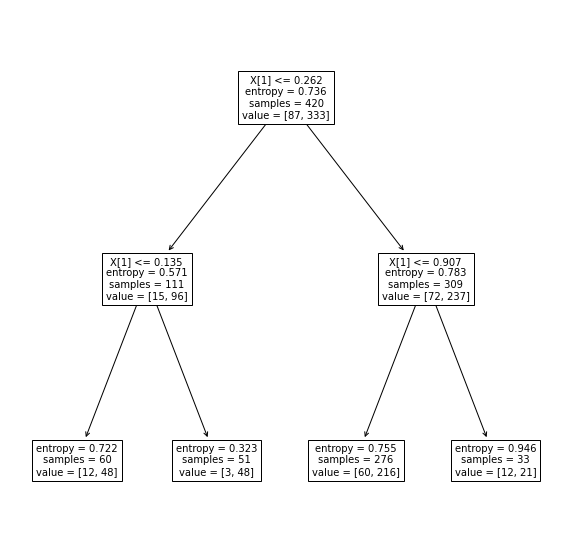

In [61]:
# Plot the decision tree
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model1, fontsize=10)
plt.show()

In [62]:
## Iteration-2: Max Depth = 3

In [63]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [65]:
#Predicting on test data
pred_test2 = model2.predict(X_test)
#Accuracy on test data
print('Test data Accuracy of model2 is:',np.mean(pred_test2==y_test))
#Predicting on train data
pred_train2 = model2.predict(X_train)
#Accuracy on train data
print('Train data Accuracy of model2 is:',np.mean(pred_train2==y_train))

Test data Accuracy of model2 is: 0.7888888888888889
Train data Accuracy of model2 is: 0.7976190476190477


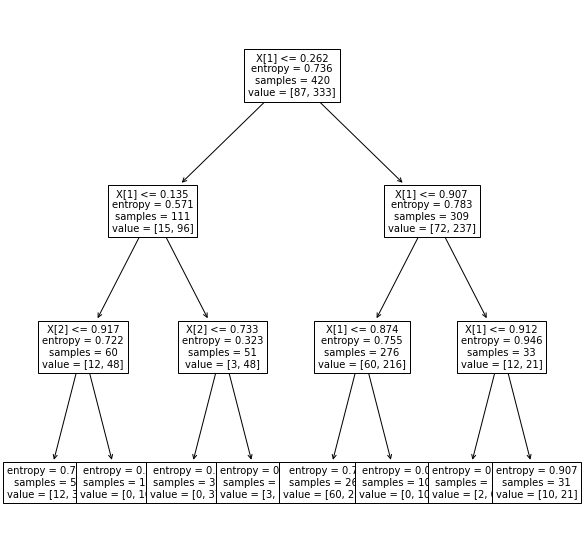

In [66]:
# Plot the decision tree where depth is 3
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model2, fontsize=10)
plt.show()

In [67]:
## Iteration-3: Max Depth = 4

In [70]:
## Building Decision Tree Classifier using Entropy Criteria Iteration-3: Max Depth = 4
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [72]:
#Predicting on test data
pred_test3 = model3.predict(X_test)
#Accuracy on test data
print('Test data Accuracy of model3 is:',np.mean(pred_test3==y_test))
#Predicting on train data
pred_train3 = model3.predict(X_train)
#Accuracy on train data
print('Train data Accuracy of model3 is:',np.mean(pred_train3==y_train))

Test data Accuracy of model3 is: 0.7833333333333333
Train data Accuracy of model3 is: 0.8023809523809524


**Building Decision Tree Classifier (CART) using Gini Criteria**

In [79]:
#Gini Criteria Where Max_depth=1
model_gini_1 = DecisionTreeClassifier(criterion='gini', max_depth=1)


In [80]:
model_gini_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [82]:
#Prediction and computing the accuracy
pred=model_gini_1.predict(X_test)
np.mean(pred==y_test)

0.7944444444444444

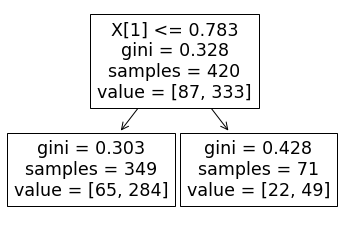

In [83]:
#PLot the decision tree
tree.plot_tree(model_gini_1);

In [84]:
#Gini Criteria Where Max_depth=3
model_gini_2 = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [85]:
model_gini_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [86]:
#Prediction and computing the accuracy
pred=model_gini_2.predict(X_test)
np.mean(pred==y_test)

0.7833333333333333

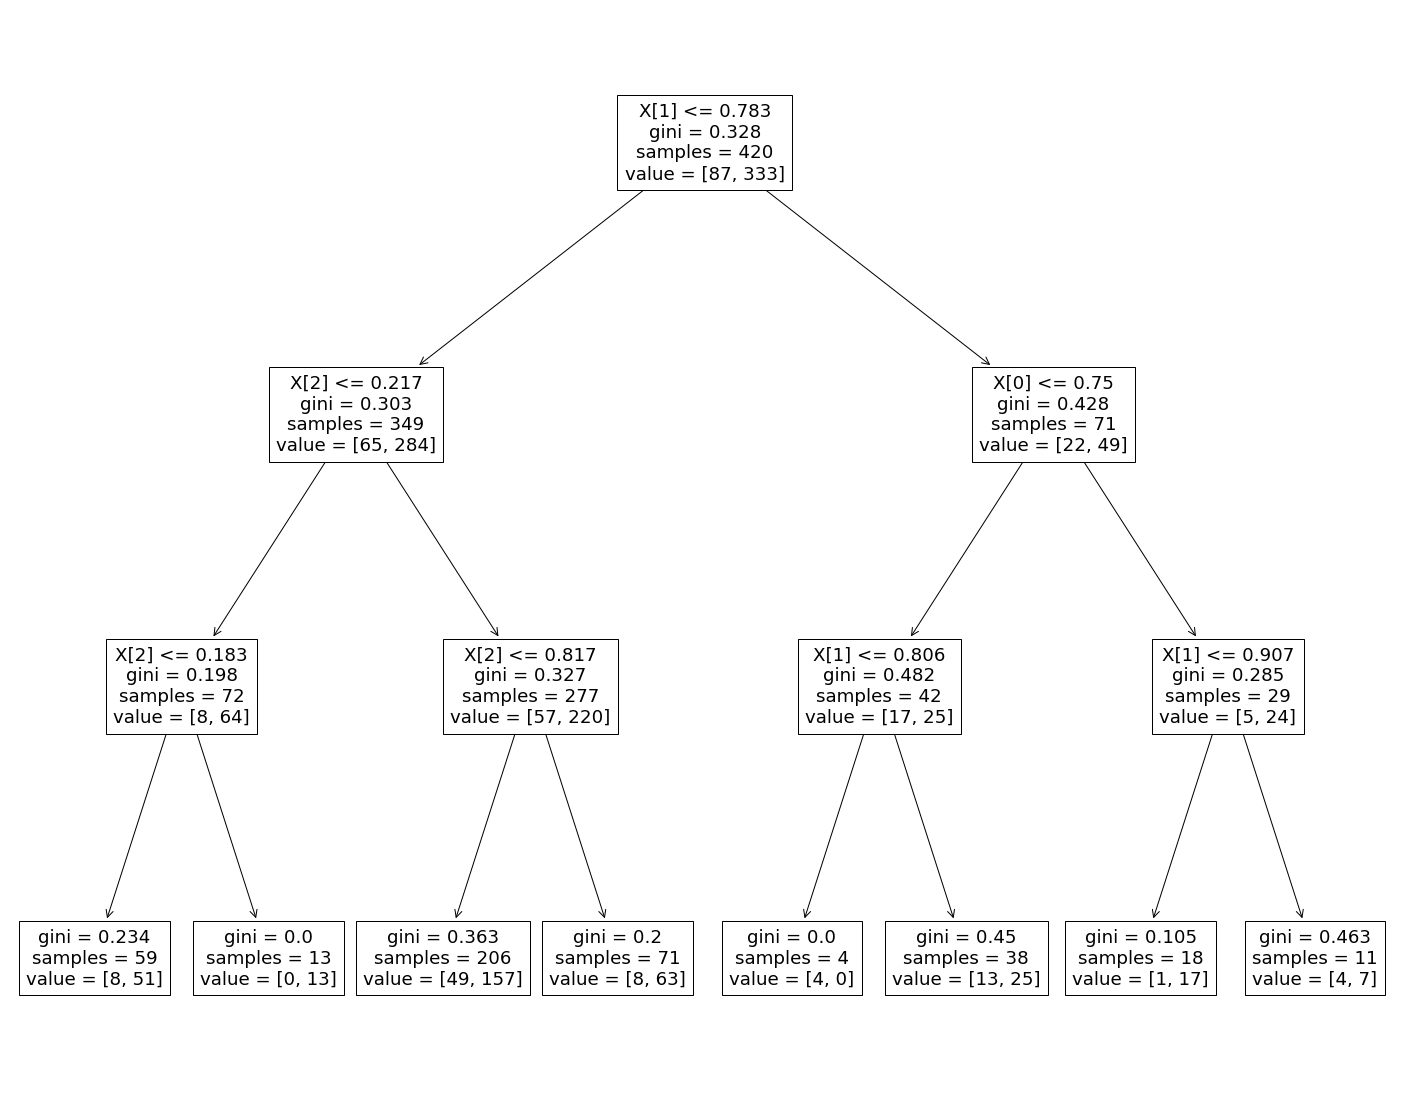

In [95]:
#PLot the decision tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model_gini_2);

**Decision Tree Regression **

In [91]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [92]:
model_reg1 = DecisionTreeRegressor()
model_reg1.fit(X_train, y_train)
DecisionTreeRegressor()

DecisionTreeRegressor()

In [93]:
#Find the accuracy
model_reg1.score(X_test,y_test)

-1.2793422793422793

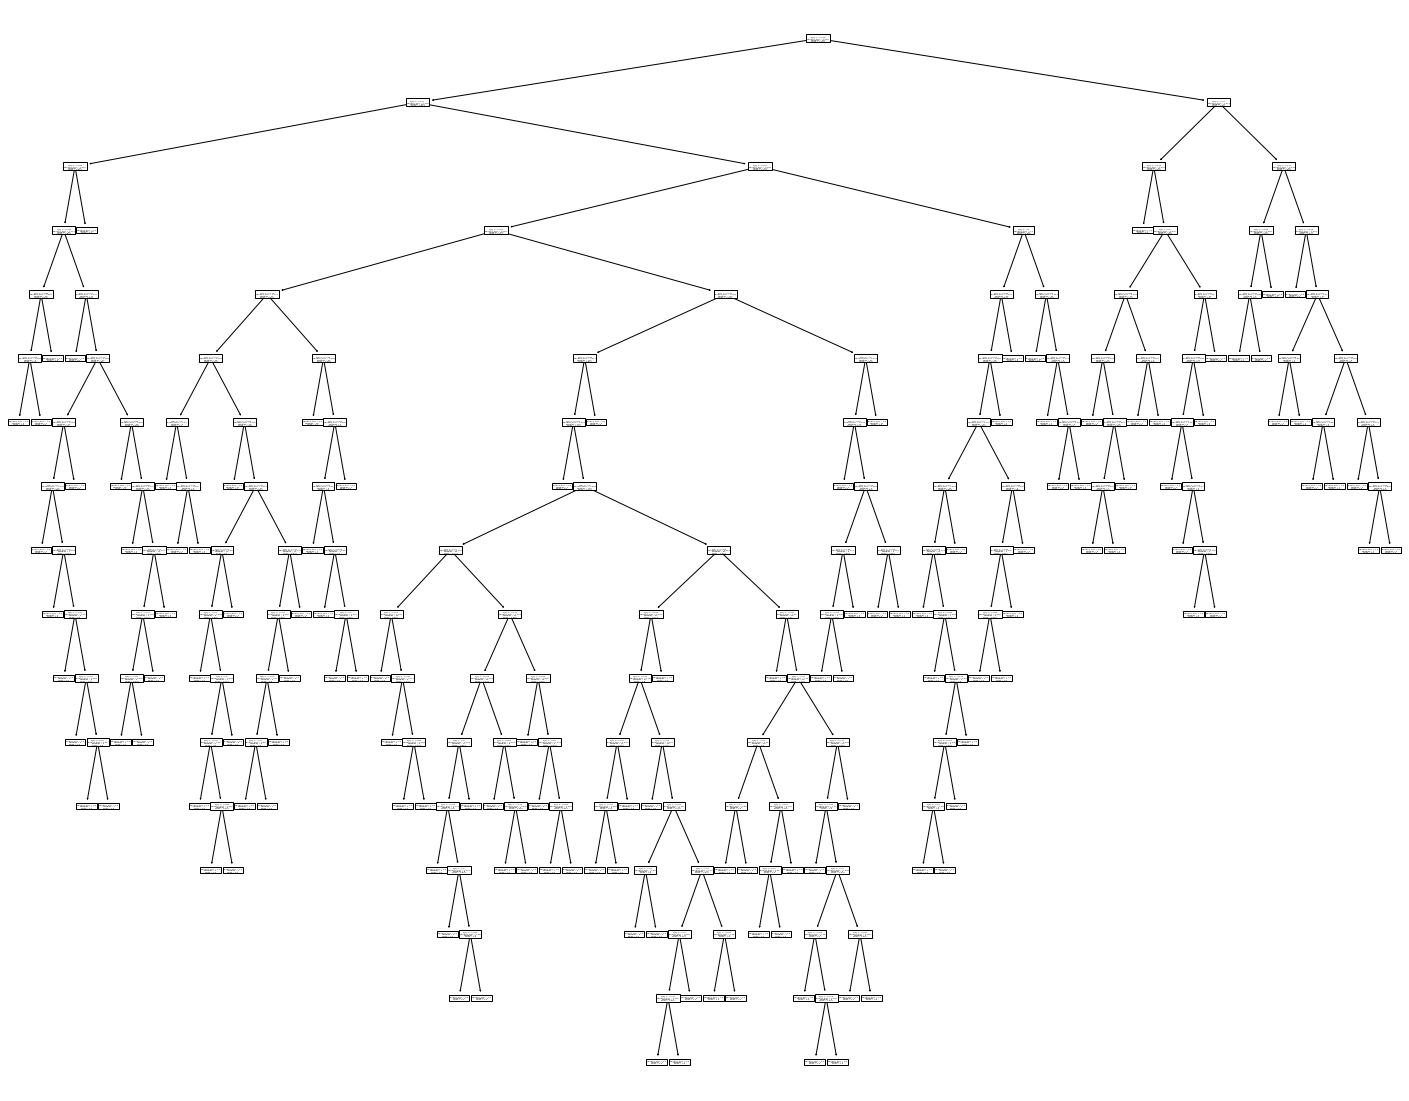

In [96]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model_reg1);

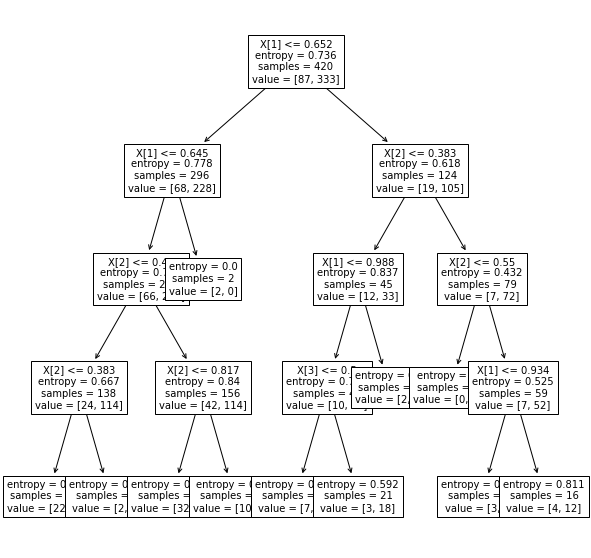

In [101]:
# Create train and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
#
# Train the model using DecisionTree classifier
#
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)
#
# Plot the decision tree
#
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf_tree, fontsize=10)
plt.show()


In [102]:
# Predicting the values of test data
y_pred =clf_tree.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score: 0.7888888888888889')

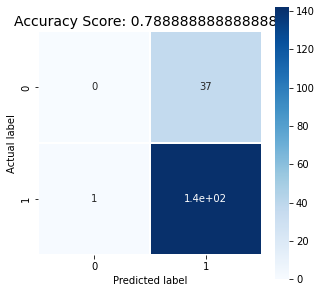

In [106]:
from sklearn.metrics import classification_report, confusion_matrix 
cm = confusion_matrix(y_test, pred_test1 )
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(clf_tree.score(X_test, y_test))
plt.title(all_sample_title, size = 14)

**RandomForest Regressor**

In [107]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [109]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.33249999999999996
Mean Squared Error: 0.20423611111111112
Root Mean Squared Error: 0.451924895431875


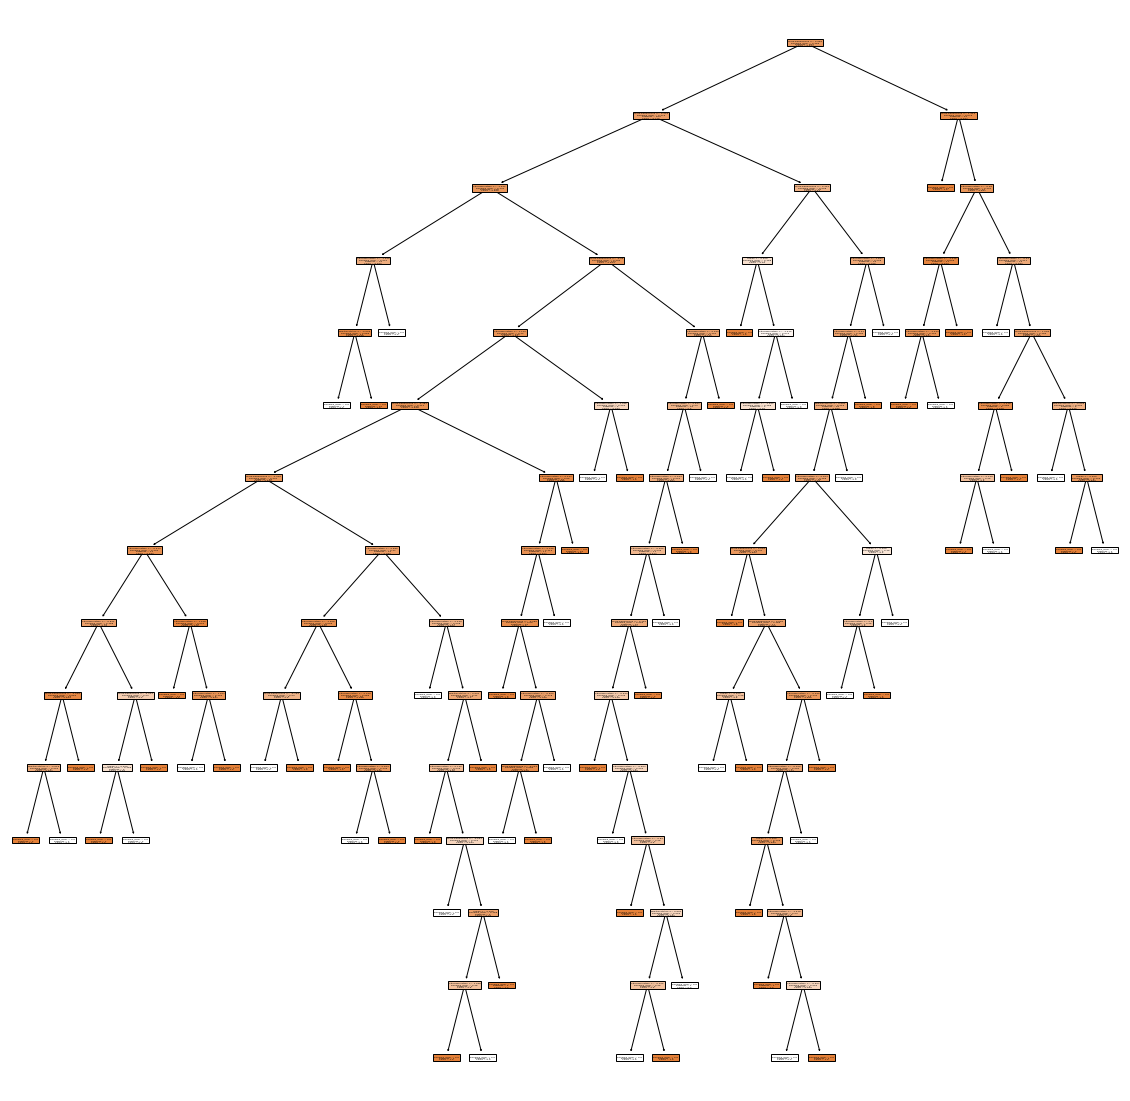

In [110]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(regressor.estimators_[0], feature_names=X.columns, filled=True)

In [114]:
from sklearn.ensemble import RandomForestClassifier
# Random Forests in `scikit-learn` (with N =50)
rfc = RandomForestClassifier(n_estimators=50,
                            random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [116]:
y_pred = rfc.predict(X_train)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1.

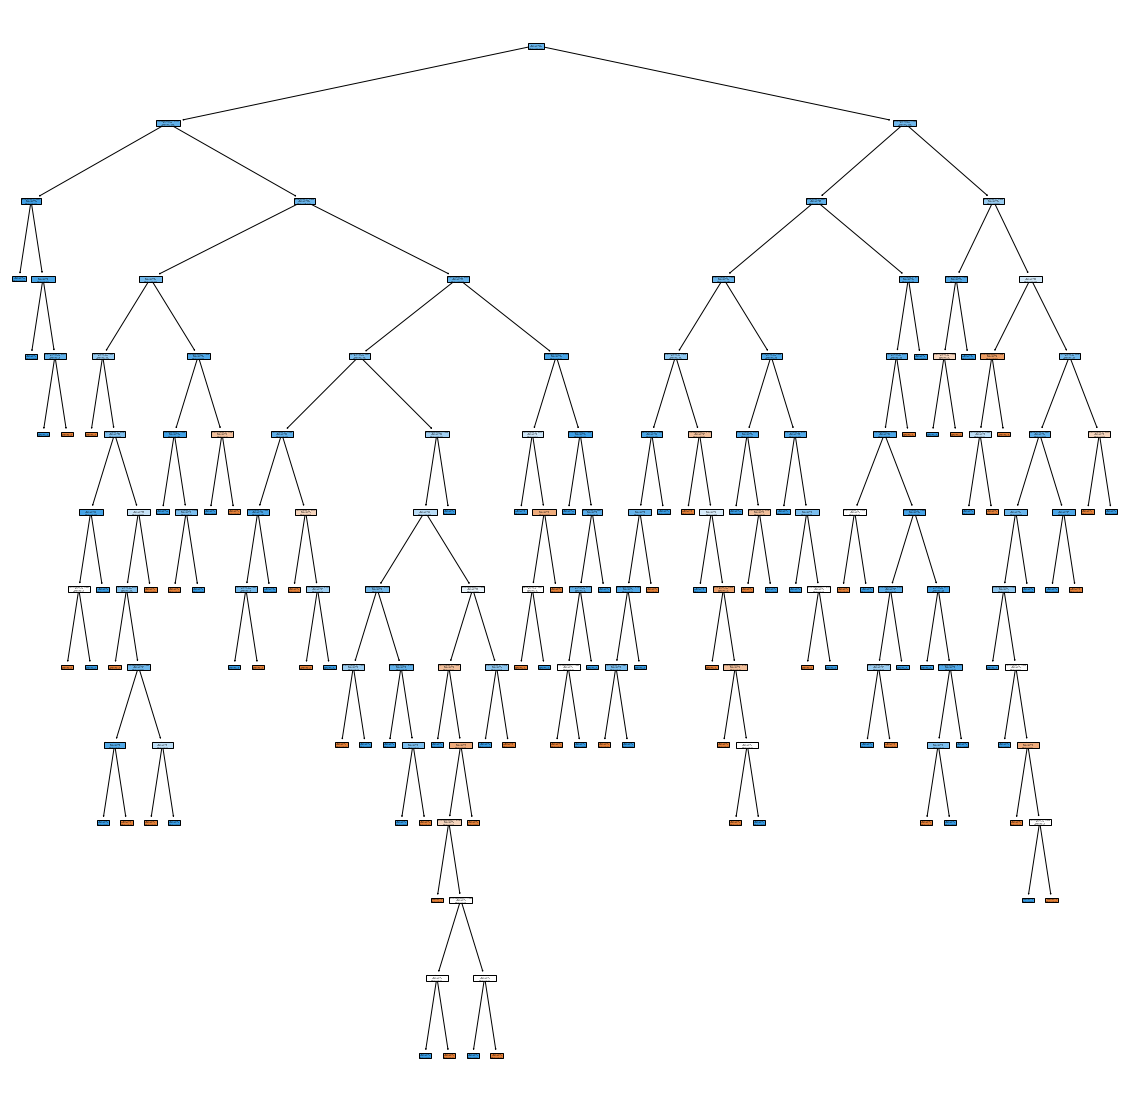

In [113]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rfc.estimators_[0], feature_names=X.columns, filled=True)

**Bagged Decision Trees for Classification**

In [124]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

In [125]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=1)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7383333333333333


In [126]:
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [127]:
pred1 = model.predict(X_test)
pred1

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1.])

In [129]:
data_new=pd.DataFrame({'Actual':y_test, 'Predicted':pred1 })
data_new

,Actual,Predicted
68,0.0,1.0
61,0.0,1.0
326,0.0,1.0
488,1.0,1.0
75,1.0,1.0
...,...,...
299,1.0,0.0
362,0.0,1.0
31,1.0,1.0
204,0.0,1.0


**AdaBoost Classification**

In [130]:
from sklearn.ensemble import AdaBoostClassifier
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model1 = AdaBoostClassifier(base_estimator=cart, n_estimators=num_trees, random_state=1)
results = cross_val_score(model1, X, y, cv=kfold)
print(results.mean())

0.6266666666666667


In [131]:
model1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=1)

In [133]:
pred2 = model1.predict(X_test)
pred2

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1.])

In [135]:
data_new2=pd.DataFrame({'Actual':y_test, 'Predicted':pred2 })
data_new2

,Actual,Predicted
68,0.0,1.0
61,0.0,1.0
326,0.0,1.0
488,1.0,1.0
75,1.0,1.0
...,...,...
299,1.0,0.0
362,0.0,1.0
31,1.0,1.0
204,0.0,1.0


**Conclusion**                                                             
**DecisionTreeClassifier gives in iteration 1 as max_dept=2**                  
Test data Accuracy is: 0.7944444444444444                                  
Train data Accuracy is: 0.7928571428571428                                 

***DecisionTreeClassifier gives in iteration 2 as max_dept=3***                  
Test data Accuracy of model2 is: 0.7888888888888889                        
Train data Accuracy of model2 is: 0.7976190476190477

**DecisionTreeClassifier gives in iteration 3 as max_dept=4**
Test data Accuracy of model3 is: 0.7833333333333333                       
Train data Accuracy of model3 is: 0.8023809523809524                       

**Gini Criteria Where Max_depth=1**                                       
Accuracy = 0.7944444444444444                                              
**Gini Criteria Where Max_depth=3**
Accuracy = 0.7833333333333333

**DecisionTreeRegressor Score** = -1.2793422793422793                      

**Confusion mAtrix Score where max_dept=4** gives Accuracy Score: 0.7888888888888889                                                             
**Random Forest Regression**                                                
Mean Absolute Error: 0.33249999999999996                                   
Mean Squared Error: 0.20423611111111112                                    
Root Mean Squared Error: 0.451924895431875                                 
**Bagged Decision Tree Classification score**  0.7383333333333333          
**Adboost Classification Score** 0.6266666666666667


The Decision Tree Classifier Gives a best Accuracy as comapred to other model of decision tree